In [396]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [397]:
# import excel data
df = pd.read_excel (r'data/COVID-19-geographic-disbtribution-worldwide-2020-06-10.xlsx')

# list of countries
countries = df['countriesAndTerritories'].unique()

# list of dates
dates = df['dateRep'].unique()

In [398]:
# final dataframe
df_final = pd.DataFrame({'dateRep': dates})
df_final.sort_values(by='dateRep', inplace=True)
df_final.reset_index(inplace=True, drop=True)

# loop through each country in the dataframe
for country in countries:
    
    # select country rows from original dataframe and sort by date
    df_country = df[df['countriesAndTerritories'] == country]
    df_country.sort_values(by='dateRep', inplace=True)
    
    # apply 7 day rolling average and per 100,000 people of country population
    df_country['rollingCases'] = df_country['cases'].rolling(7).mean()
    cases_max = df_country['rollingCases'].max()
    df_country['casesPercent'] = df_country['rollingCases'] / cases_max
    df_country.reset_index(inplace=True, drop=True)
    
    # add column with values to final dataframe
    df_final[country] = df_country['casesPercent']
    
df_final

C:\Users\Smili\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Smili\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Smili\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,dateRep,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,...,United_States_of_America,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2020-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.674215,NaN,NaN,NaN,NaN,0.043011,NaN,NaN,NaN,NaN
159,2020-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.669411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,2020-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.680570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,2020-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.670444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [399]:
# dataframe containing all the dates
df_final = pd.DataFrame({'dateRep': dates})
df_final.sort_values(by='dateRep', inplace=True)
df_final.reset_index(inplace=True, drop=True)

# dataframe for sorting countries by max new cases date
df_max = pd.DataFrame(columns=['country', 'max_cases_row'])

# loop through each country in the dataframe
for country in countries:
    
    # select country rows from original dataframe and sort by date
    df_country = df[df['countriesAndTerritories'] == country]
    df_country.sort_values(by='dateRep', inplace=True)
    
    # apply 5 day rolling average, get max, calculate percent of max of new cases
    df_country['rollingCases'] = df_country['cases'].rolling(5).mean()
    cases_max = df_country['rollingCases'].max()
    df_country['casesPercent'] = df_country['rollingCases'] / cases_max
    df_country.reset_index(inplace=True, drop=True)
    
    # drop columns and rename cases column to country for merging
    df_country = df_country[['dateRep', 'casesPercent']]
    df_country.rename(columns={'casesPercent':country}, inplace=True)
    
    # merge dataframes
    df_final = df_final.merge(df_country, how='left', on='dateRep')
    
    # store max cases
    max_cases = df_final[country].idxmax()
    df_max = df_max.append({'country' : country , 'max_cases_row' : max_cases} , ignore_index=True)
    
df_final

C:\Users\Smili\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Smili\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Smili\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,dateRep,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,...,United_States_of_America,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2020-06-06,0.981998,0.585938,0.558308,0.483516,0.000000,0.0,0.125,0.762061,0.812240,...,0.656684,0.105263,0.101852,0.530973,0.970948,0.014706,0.0,1.000000,0.131068,0.713115
159,2020-06-07,0.991651,0.695312,0.554180,0.478022,0.000000,0.0,0.125,0.838340,0.920218,...,0.663621,0.052632,0.185185,0.682891,1.000000,0.014706,0.0,0.815068,0.157767,0.622951
160,2020-06-08,1.000000,0.640625,0.544892,0.043956,0.263158,0.0,0.125,0.814673,1.000000,...,0.674345,0.052632,0.175926,0.859882,0.853211,0.044118,0.0,0.595890,0.157767,0.622951
161,2020-06-09,0.952257,0.617188,0.659443,0.005495,0.315789,0.0,0.000,0.792281,0.897469,...,0.668995,0.052632,0.157407,0.846608,0.796636,0.058824,0.0,0.636986,0.269417,0.532787


In [400]:
df_max_sorted = df_max.sort_values(by='max_cases_row')
df_max_sorted.reset_index(inplace=True, drop=True)
df_max_sorted.drop(columns='max_cases_row', inplace=True)
df_max_sorted

,country
0,China
1,Cases_on_an_international_conveyance_Japan
2,South_Korea
3,Brunei_Darussalam
4,Seychelles
...,...
205,India
206,Nigeria
207,Ethiopia
208,Liberia


In [401]:
df_sorted = pd.DataFrame()

for index, row in df_max_sorted.iterrows():
    df_sorted[row['country']] = df_final[row['country']]
    
df_sorted = df_sorted.T
df_sorted.fillna(0, inplace=True)

df_sorted

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,162
China,0.0,0.0,0.0,0.0,0.001642,0.001195,0.001195,0.001195,0.00056,0.00056,...,0.001642,0.001792,0.001978,0.001381,0.001605,0.001120,0.001195,0.001195,0.001269,0.001008
Cases_on_an_international_conveyance_Japan,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
South_Korea,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.071990,0.059589,0.056866,0.056866,0.060496,0.065336,0.071083,0.067756,0.067453,0.070780
Brunei_Darussalam,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Seychelles,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
India,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.778271,0.810491,0.839460,0.866360,0.895891,0.925903,0.962038,0.983599,0.997310,1.000000
Nigeria,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.933265,0.947125,0.977413,0.956879,0.852669,0.863450,0.849589,0.855749,0.839322,1.000000
Ethiopia,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.672857,0.751429,0.732857,0.740000,0.818571,0.904286,0.967143,0.965714,0.957143,1.000000
Liberia,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.354839,0.483871,0.677419,0.693548,0.661290,0.741935,0.790323,0.774194,0.870968,1.000000


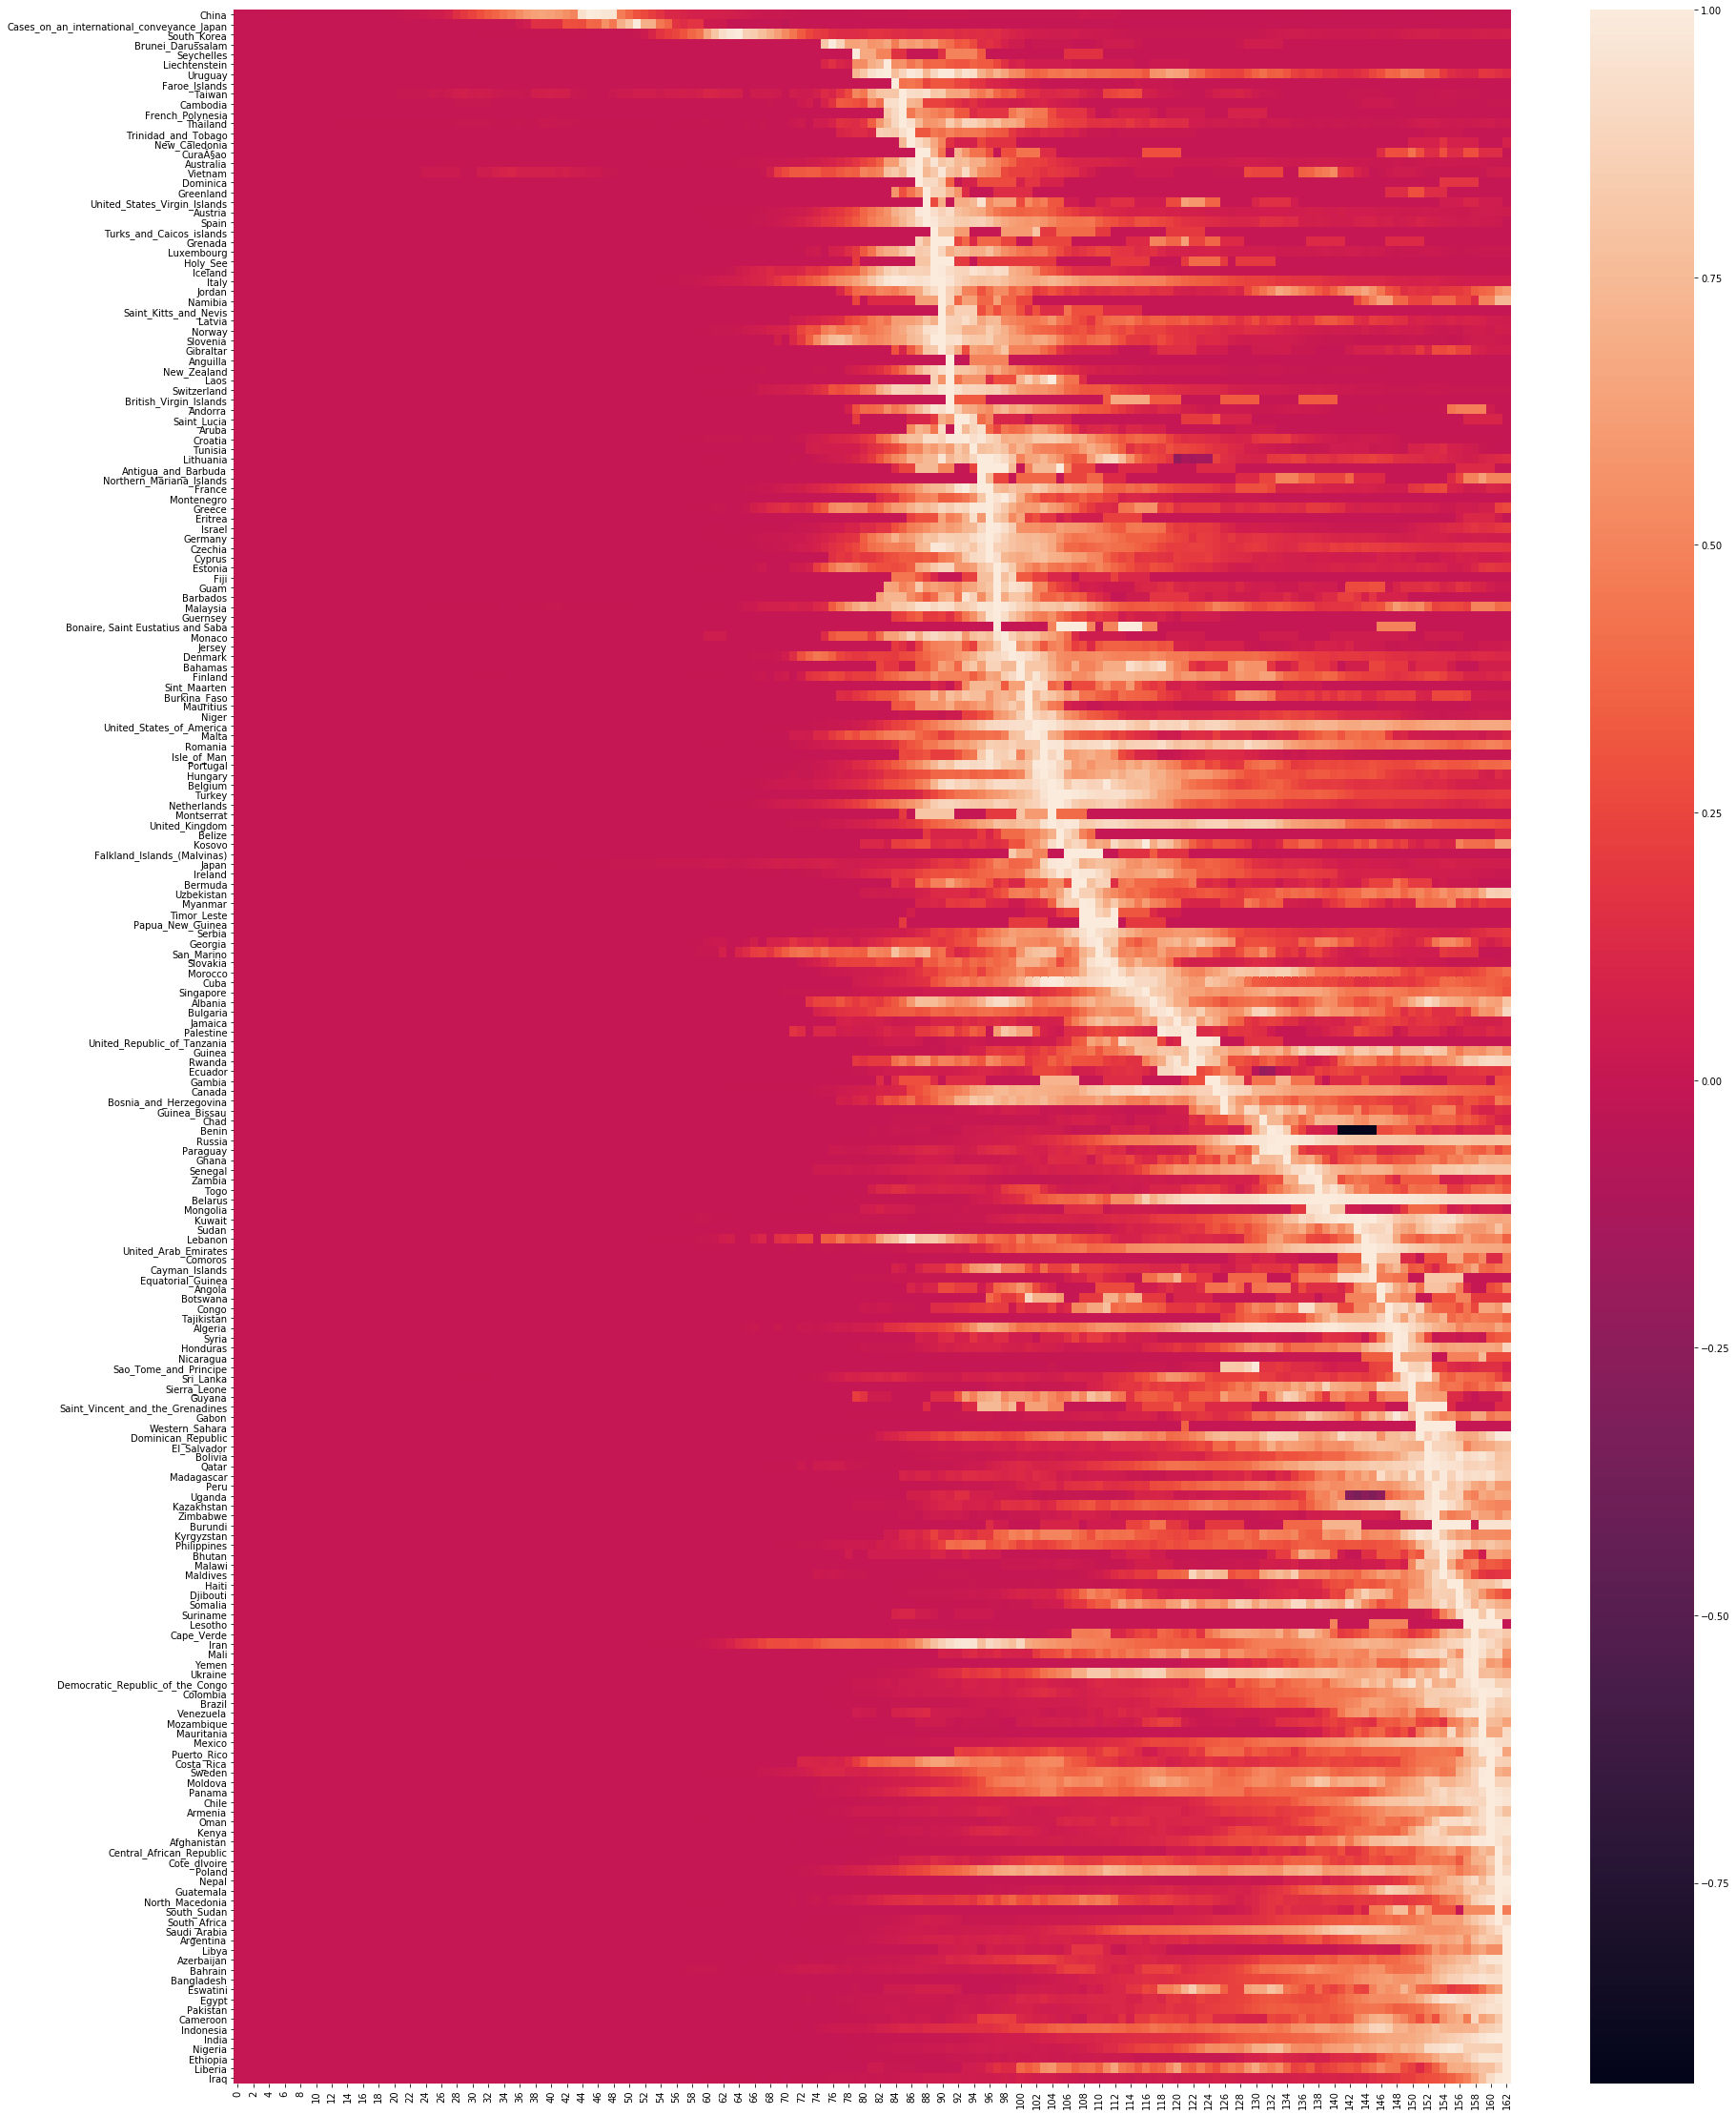

In [402]:
plt.figure(figsize=(30, 40))
sns.heatmap(df_sorted)
plt
plt.savefig('surfs-up.png')